In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from snAPI.Main import *
import pandas as pd
sys.path.append("../")
from HH import HH_T3
from Functions import *
import time

In [15]:
def getcols(m1,nrows):
    arr=np.array([])
    for elem in np.cumsum(m1):
        rest=elem%(nrows)
        inte=elem//(nrows)
        if inte%2==1:
            a=nrows-rest
        else:
            a=rest 
        arr=np.append(arr,a)       
    return arr

f=lambda x : nrows-x%(nrows) if x//(nrows)%2==1 else x%(nrows)

In [16]:
filename='../../../Acquisition2/Data/Trial_markers_QD/T/PTU_9.ptu'
os.listdir(filename)

NotADirectoryError: [WinError 267] El nombre del directorio no es válido: '../../../Acquisition2/Data/Trial_markers_QD/T/PTU_9.ptu'

In [28]:
sn=snAPI()
sn.getDevice()
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T3)
sn.unfold.measure()
times, channels = sn.unfold.getBlock()
dtimes=sn.unfold.dTime_T3(times)
markers_Bool=np.array([sn.unfold.isMarker(datai) for datai in channels])
m1=markers_Bool*sn.unfold.markers(channels)[2]
m2=markers_Bool*sn.unfold.markers(channels)[3]
m3=markers_Bool*sn.unfold.markers(channels)[1]


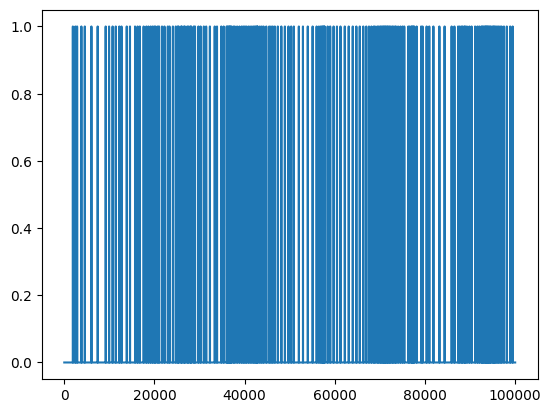

In [29]:
plt.plot(m3[0:100000])

In [30]:
cum=np.cumsum(markers_Bool)
rm=np.array([n%2 for n in cum])
row=np.array(np.cumsum(m2),dtype=int)
df=pd.DataFrame(np.array([dtimes,times,channels,markers_Bool,m1,m2,m3,rm]).T,columns=['dTimes','absTimes','Channels','markers','m1','m2','m3','rm'])
df['row']=row
nrows=np.sum(df['m1'][df['row']==2])
col=np.array([f(x) for x in np.cumsum(m1)],dtype=int)
df['col']=col

In [31]:
data= df[df['rm'] ==1]
data.drop(columns=['m1', 'm2','m3','markers','rm'])

,dTimes,absTimes,Channels,row,col
1760,3904.0,1.696978e+12,133.0,0,1
1761,13280.0,1.697483e+12,3.0,0,1
1762,23200.0,1.699009e+12,3.0,0,1
1763,960.0,1.699790e+12,3.0,0,1
1764,9376.0,1.700130e+12,3.0,0,1
...,...,...,...,...,...
1586272,6176.0,6.266224e+14,3.0,49,0
1586273,32576.0,6.266231e+14,3.0,49,0
1586274,2464.0,6.266247e+14,3.0,49,0
1586275,24992.0,6.266254e+14,3.0,49,0


In [32]:
xs=np.unique(df['row'])
ys=np.unique(df['col'])
M=np.zeros((np.size(xs),np.size(ys)))
for xi in xs:
    for yi in ys:
        M[xi,yi]=np.size(df['dTimes'][(df['row']==xi)&(df['col']==yi)])


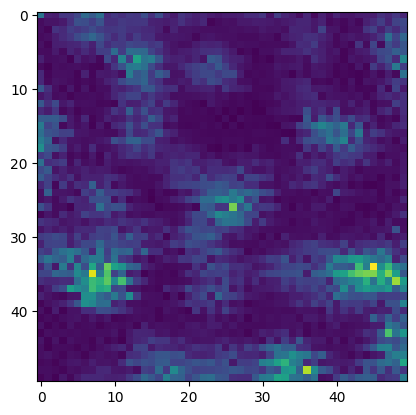

In [33]:
plt.imshow(M)